<a href="https://colab.research.google.com/github/krissivolga29-commits/analytics_big_data/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание:
Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.

Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.

Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически (один вопрос/гипотеза — один график).

Желательно, но не обязательно:
Если данные содержат пропуски, заполните их и обоснуйте своё решение. Проверьте, как изменились базовые статистики до и после замены.

Информация:

Brand: Марка или производитель автомобиля.

Model: Конкретная модель автомобиля.

Color: Цвет кузова автомобиля.

Registration Date: Дата регистрации автомобиля (месяц/год).

Year of Production: Год выпуска автомобиля.

Price in Euro: Цена автомобиля в евро.

Power: Мощность автомобиля в киловаттах (кВт) и лошадиных силах (л.с.).

Transmission Type: Тип коробки передач (например, автоматическая, механическая).

Fuel Type: Тип топлива, который требуется автомобилю.

Fuel Consumption:Информация о расходе топлива автомобиля в л/100км анг г/км.

Mileage: Общий путь, пройденный автомобилем в км.

Offer Description: Дополнительное описание представлено в предложении автомобиля.

In [ ]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
car = pd.read_csv('https://raw.githubusercontent.com/catprokhorova/HW_datasets/main/EDA_1/german_used_cars.csv')
car.head(10)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
5,5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,47307.0,2.0 16V Twin Spark
6,6,alfa-romeo,Alfa Romeo 145,red,12/1996,1996,3500,110,150,Manual,Petrol,"8,8 l/100 km",210 g/km,230000.0,Quadrifoglio
7,7,alfa-romeo,Alfa Romeo 164,black,07/1996,1996,5500,132,179,Manual,Petrol,"13,4 l/100 km",320 g/km,168000.0,(3.0) V6 Super
8,8,alfa-romeo,Alfa Romeo Spider,black,07/1996,1996,8990,141,192,Manual,Petrol,11 l/100 km,265 g/km,168600.0,|HU:neu|Klimaanlage|Youngtimer|
9,9,alfa-romeo,Alfa Romeo Spider,black,01/1996,1996,6976,110,150,Manual,Petrol,"9,2 l/100 km",220 g/km,99000.0,2.0 T.Spark L *Klima *2.Hand *Zahnriemen


In [ ]:
# для получения информации о датасете, используем метод info
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [ ]:
car['brand'].unique()

array(['alfa-romeo', 'aston-martin', 'audi', 'bentley', 'bmw', 'cadillac',
       'chevrolet', 'chrysler', 'citroen', 'dacia', 'daewoo', 'daihatsu',
       'dodge', 'ferrari', 'fiat', 'ford', 'honda', 'hyundai', 'infiniti',
       'isuzu', 'jaguar', 'jeep', 'kia', 'lada', 'lamborghini', 'lancia',
       'land-rover', 'maserati', 'mazda', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'opel', 'peugeot', 'porsche', 'proton',
       'renault', 'rover', 'saab', 'seat', 'skoda', 'smart', 'ssangyong',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
# посмотрим описательную статистику по датасету
car.describe()

,Unnamed: 0,year,price_in_euro,power_ps,mileage_in_km
count,250752.000000,250752.000000,2.507520e+05,250752.000000,2.506920e+05
mean,125529.935837,2016.262889,2.611763e+04,171.693618,8.537758e+04
std,72482.715857,5.462600,3.685548e+04,97.890860,7.872525e+04
min,0.000000,1995.000000,1.200000e+02,1.000000,0.000000e+00
25%,62768.750000,2013.000000,1.199000e+04,111.000000,2.495975e+04
50%,125527.500000,2018.000000,1.989000e+04,150.000000,6.752900e+04
75%,188285.250000,2020.000000,2.995000e+04,190.000000,1.265500e+05
max,251078.000000,2023.000000,5.890500e+06,999.000000,3.800000e+06


In [ ]:
# преобразуем столбец с годами к числовому типу

car['year'] = pd.to_numeric(car['year'],errors='coerce')
car.dropna(subset=['year'], inplace=True)

car['year'].unique()

array([ 1995.,  1996.,  1997.,  1998.,  1999.,  2000.,  2001.,  2002.,
        2003.,  2004.,  2005.,  2006.,  2007.,  2008.,  2009.,  2010.,
        2011.,  2012.,  2013.,  2014.,  2015.,  2016.,  2017.,  2018.,
        2019.,  2020.,  2021.,  2022.,  2023.,  3700., 27449., 14990.,
       10900.])

In [ ]:
# удалить строки с неверными значениями в столбце 'year'
car = car[~car['year'].isin([3700, 27449, 14990, 10900])]

In [ ]:
# преобразование типа данных столбца 'year' в целочисленный
car['year'] = car['year'].astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250880 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                250880 non-null  int64  
 1   brand                     250880 non-null  object 
 2   model                     250880 non-null  object 
 3   color                     250714 non-null  object 
 4   registration_date         250880 non-null  object 
 5   year                      250880 non-null  int64  
 6   price_in_euro             250880 non-null  object 
 7   power_kw                  250752 non-null  object 
 8   power_ps                  250752 non-null  object 
 9   transmission_type         250880 non-null  object 
 10  fuel_type                 250880 non-null  object 
 11  fuel_consumption_l_100km  224007 non-null  object 
 12  fuel_consumption_g_km     250880 non-null  object 
 13  mileage_in_km             250818 non-null  float6

In [ ]:
# преобразуем столбец с ценами к числовому типу

car['price_in_euro'] = pd.to_numeric(car['price_in_euro'],errors='coerce')
car.dropna(subset=['price_in_euro'], inplace=True)

car['price_in_euro'].unique()

array([ 1300, 24900,  5900, ..., 81350, 89690, 61521])

In [ ]:
# преобразование типа данных столбца 'price_in_euro' в целочисленный
car['price_in_euro'] = car['price_in_euro'].astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250880 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                250880 non-null  int64  
 1   brand                     250880 non-null  object 
 2   model                     250880 non-null  object 
 3   color                     250714 non-null  object 
 4   registration_date         250880 non-null  object 
 5   year                      250880 non-null  int64  
 6   price_in_euro             250880 non-null  int64  
 7   power_kw                  250752 non-null  object 
 8   power_ps                  250752 non-null  object 
 9   transmission_type         250880 non-null  object 
 10  fuel_type                 250880 non-null  object 
 11  fuel_consumption_l_100km  224007 non-null  object 
 12  fuel_consumption_g_km     250880 non-null  object 
 13  mileage_in_km             250818 non-null  float6

In [ ]:
# преобразуем столбец с мощностью в л.с. к числовому типу

car['power_ps'] = pd.to_numeric(car['power_ps'],errors='coerce')
car.dropna(subset=['power_ps'], inplace=True)

car['power_ps'].unique()

array([201., 260., 150., 179., 192., 220., 120., 140., 207., 155., 144.,
       103., 190., 106., 105., 250., 116., 166., 167., 165., 241., 185.,
       200., 252., 175., 239., 160., 163., 209., 182.,  95.,  79.,  90.,
       450., 170., 235., 135.,  84.,  86.,  69.,  77., 310., 360., 280.,
       136., 510., 540., 131., 156., 159.,  14., 129., 340., 332., 460.,
       420., 432., 469., 435., 466., 416., 476., 455., 457., 470., 385.,
       528., 426., 517., 405., 760., 496., 436., 498., 574., 572., 547.,
       575., 578., 518., 548., 560., 608., 571., 604., 602., 446., 609.,
       725., 551., 700., 707., 536., 534., 549., 639., 101., 125., 110.,
       299., 193., 224., 230., 265., 102.,  75., 174., 381.,  61., 320.,
       181., 344., 334., 262., 275., 177., 232., 507., 211., 256., 173.,
       480., 204., 306., 349., 133., 162., 326., 479., 286., 145., 290.,
       354., 143., 300., 272., 266., 408., 124., 579., 231., 245., 333.,
       364., 465., 500., 199., 390., 238., 400., 33

In [ ]:
# преобразование типа данных столбца 'price_in_euro' в целочисленный
car['power_ps'] = car['power_ps'].astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250752 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                250752 non-null  int64  
 1   brand                     250752 non-null  object 
 2   model                     250752 non-null  object 
 3   color                     250586 non-null  object 
 4   registration_date         250752 non-null  object 
 5   year                      250752 non-null  int64  
 6   price_in_euro             250752 non-null  int64  
 7   power_kw                  250752 non-null  object 
 8   power_ps                  250752 non-null  int64  
 9   transmission_type         250752 non-null  object 
 10  fuel_type                 250752 non-null  object 
 11  fuel_consumption_l_100km  223931 non-null  object 
 12  fuel_consumption_g_km     250752 non-null  object 
 13  mileage_in_km             250692 non-null  float6

color
black     0.234079
grey      0.186503
white     0.161853
silver    0.136935
blue      0.127896
red       0.084749
brown     0.017591
green     0.013959
orange    0.013425
beige     0.009641
yellow    0.007091
bronze    0.002335
gold      0.002315
violet    0.001628
Name: proportion, dtype: float64

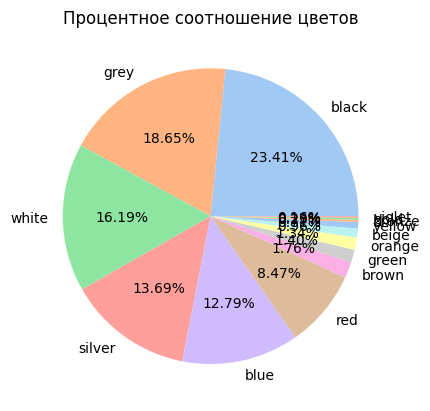

In [ ]:
# Какой цвет самый популярный среди машин?
color = car["color"].value_counts(normalize=True)
display(color)
# зададим цветовую палитру
colors = sns.color_palette('pastel')

plt.pie(color, labels=color.index, colors=colors, autopct='%.2f%%')
plt.title("Процентное соотношение цветов")
plt.show()

Как видно из диаграммы, самый распространенный цвет черный, на втором месте серый.

brand
volkswagen       0.132552
mercedes-benz    0.108436
audi             0.084280
opel             0.081202
bmw              0.078899
ford             0.074837
skoda            0.055915
seat             0.047591
renault          0.034627
toyota           0.032771
hyundai          0.027836
peugeot          0.023291
kia              0.022837
fiat             0.020069
mini             0.017106
mazda            0.016772
volvo            0.016584
citroen          0.016262
porsche          0.015764
nissan           0.015071
dacia            0.013410
land-rover       0.012239
jeep             0.006966
smart            0.006544
alfa-romeo       0.005723
jaguar           0.005568
mitsubishi       0.003720
honda            0.003127
maserati         0.002780
dodge            0.002665
ferrari          0.002350
bentley          0.002155
lamborghini      0.001438
ssangyong        0.001362
aston-martin     0.001103
saab             0.000928
isuzu            0.000820
daihatsu         0.000812
chevro

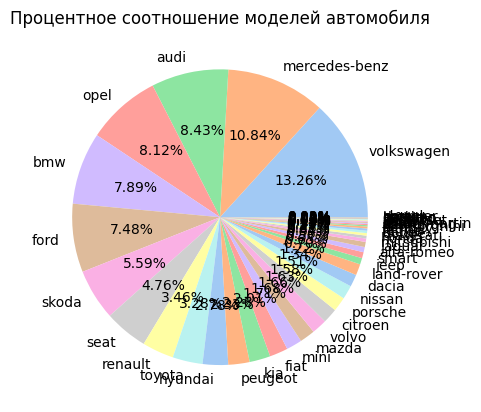

In [ ]:
# Какой цвет самый популярный среди машин?
brand = car["brand"].value_counts(normalize=True)
display(brand)
# зададим цветовую палитру
colors = sns.color_palette('pastel')

plt.pie(brand, labels=brand.index, colors=colors, autopct='%.2f%%')
plt.title("Процентное соотношение моделей автомобиля")
plt.show()

Как видно из диаграммы, в датасете больше представлено автомобилей марки 'volkswagen'

Text(0.5, 1.0, 'Тип трансмиссии')

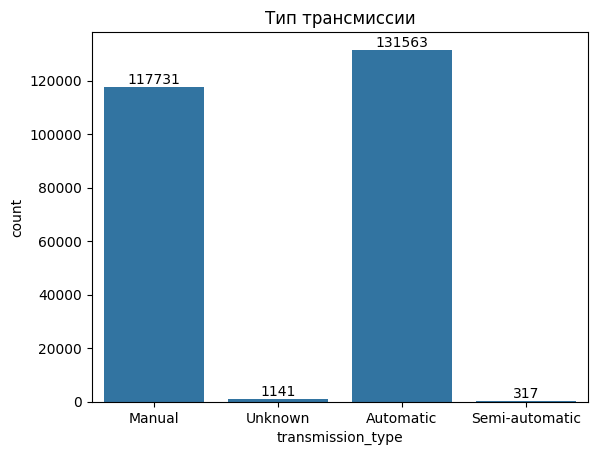

In [ ]:
# как распределены различные типы трансмиссии среди автомобилей?
ax = sns.countplot(x='transmission_type', data=car)
ax.bar_label(ax.containers[0])
plt.title("Тип трансмиссии")

Как видно из диаграммы, больше машин с автоматической коробкой передач

fuel_type
Petrol           0.571206
Diesel           0.344548
Hybrid           0.050169
Electric         0.023749
LPG              0.005005
CNG              0.002026
Diesel Hybrid    0.001898
Other            0.000690
Unknown          0.000351
Hydrogen         0.000319
Ethanol          0.000040
Name: proportion, dtype: float64

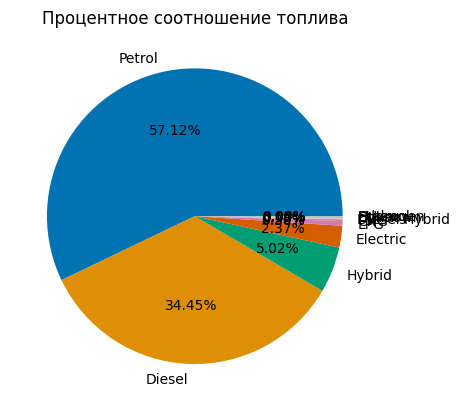

In [ ]:
# Какой тип топлива распространен среди машин?
fuel_type = car["fuel_type"].value_counts(normalize=True)
display(fuel_type)
# зададим цветовую палитру
colors = sns.color_palette('colorblind')

plt.pie(fuel_type, labels=fuel_type.index, colors=colors, autopct='%.2f%%')
plt.title("Процентное соотношение топлива")
plt.show()

Больше половины машин (57%) ездит на бензине.

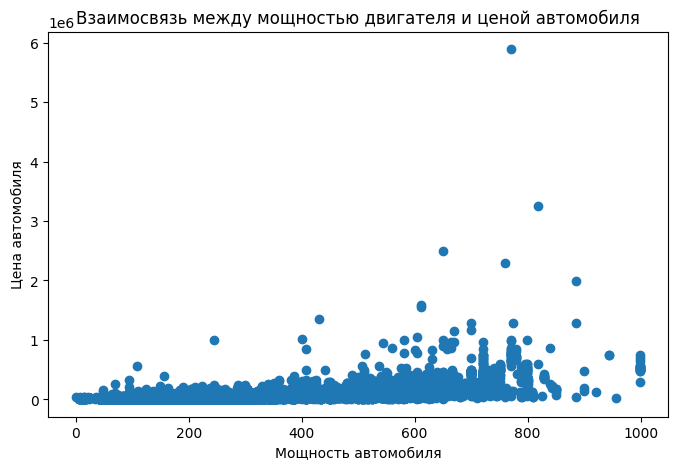

In [ ]:
# Построим точечную диаграмму, чтобы проверить, есть ли корреляция между мощностью двигателя и ценой автомобиля.
plt.figure(figsize=[8, 5])
plt.scatter(data=car, x="power_ps", y="price_in_euro")
plt.title("Взаимосвязь между мощностью двигателя и ценой автомобиля")
plt.ylabel("Цена автомобиля")
plt.xlabel("Мощность автомобиля")
plt.show()

Согласно диаграммы наблюдается зависимость между мощностью автомобиля и ценой.Чем больше мощность автомобиля, тем больше цена

In [ ]:
# рассчитаем корреляцию вручную
#коэф. корреляции Пирсона:
p_coef = car[['power_ps', 'price_in_euro']].corr()

#коэф. корреляции Спирмана:
s_coef = car[['power_ps', 'price_in_euro']].corr(method='spearman')

#определение типа зависимости:
if p_coef['power_ps'].to_list()[0] > 0:
    print('Тип зависимости — положительная;')
elif p_coef['power_ps'].to_list()[0] < 0:
    print('Тип зависимости — отрицательная;')
else:
    print('Зависимость не обнаружена.')

#определение силы связи
if 0 < abs(p_coef['power_ps'].to_list()[0]) <= 0.3:
    print('Очень слабая зависимость')
elif 0.3 < abs(p_coef['power_ps'].to_list()[0]) <= 0.5:
    print('Слабая зависимость')
elif 0.5 < abs(p_coef['power_ps'].to_list()[0]) <= 0.7:
    print('Средняя зависимость')
elif 0.7 < abs(p_coef['power_ps'].to_list()[0]) <= 0.9:
    print('Высокая зависимость')
elif 0.9 < abs(p_coef['power_ps'].to_list()[0]) <= 1:
    print('Очень высокая зависимость')

Тип зависимости — положительная;
Очень высокая зависимость
